# Library Imports

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
from PIL import Image
import cv2

# Dataset and Preprocessing

In [ ]:
DATASET_LOCATION = "/datasets/animal_dataset"

In [4]:
import os
LABELS = os.listdir(DATASET_LOCATION)

In [5]:
from PIL import Image

def load_images(location):
  images = []

  for class_label, folder in enumerate(os.listdir(DATASET_LOCATION)):
    for image in os.listdir(os.path.join(DATASET_LOCATION, folder)):
      img_path = os.path.join(DATASET_LOCATION, folder, image)
      img = Image.open(img_path)
      img_arr = np.array(img)

      images.append((img_arr, class_label))
  return images

In [8]:
# Load images
images = load_images(DATASET_LOCATION) # image array, class label

panda


array([[[ 78, 118,  68],
        [124, 153, 107],
        [152, 182, 120],
        ...,
        [  8,  28,  19],
        [ 24,  51,  36],
        [ 48,  86,  63]],

       [[ 95, 126,  92],
        [129, 161, 120],
        [153, 194, 128],
        ...,
        [ 27,  51,  29],
        [ 52,  94,  54],
        [ 80, 128,  76]],

       [[110, 133,  79],
        [183, 210, 133],
        [118, 160,  94],
        ...,
        [ 39,  59,  32],
        [ 74, 115,  71],
        [ 90, 145,  87]],

       ...,

       [[108, 145,  75],
        [161, 211, 116],
        [ 88, 129,  51],
        ...,
        [ 36,  86,  33],
        [143, 185, 139],
        [135, 173, 132]],

       [[144, 182, 109],
        [169, 220, 125],
        [ 51,  78,  33],
        ...,
        [132, 166, 115],
        [127, 149, 103],
        [ 85, 124,  77]],

       [[160, 199, 120],
        [129, 177,  77],
        [ 41,  57,  28],
        ...,
        [ 65,  95,  45],
        [ 67, 102,  46],
        [ 75, 110,  56]]], dtype=uint8)
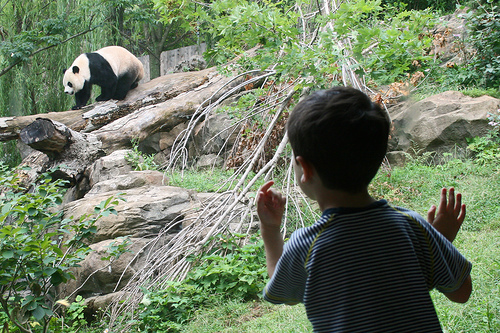

In [9]:
print(LABELS[images[250][1]])
images[250][0]

In [10]:
X = np.array([image[0] for image in images], dtype=object)
y = np.array([image[1] for image in images])
print(len(X), len(y))

300 300


In [11]:
# Normalizing images
normalized = False
if not normalized:
  X = X / 255.0
  normalized = True
X[:2]

array([array([[[0.34509804, 0.35686275, 0.38431373],
               [0.34901961, 0.36078431, 0.38823529],
               [0.35294118, 0.36470588, 0.38431373],
               ...,
               [0.0627451 , 0.03921569, 0.03921569],
               [0.0627451 , 0.03921569, 0.03921569],
               [0.0627451 , 0.03921569, 0.03921569]],

              [[0.35294118, 0.36470588, 0.39215686],
               [0.35294118, 0.36470588, 0.39215686],
               [0.35686275, 0.36862745, 0.38823529],
               ...,
               [0.0627451 , 0.03921569, 0.03921569],
               [0.0627451 , 0.03921569, 0.03921569],
               [0.0627451 , 0.03921569, 0.03921569]],

              [[0.36078431, 0.37254902, 0.4       ],
               [0.36078431, 0.37254902, 0.4       ],
               [0.36078431, 0.37254902, 0.4       ],
               ...,
               [0.0627451 , 0.03921569, 0.03921569],
               [0.0627451 , 0.03921569, 0.03921569],
               [0.0627451 , 0.03921

### Grayscale Conversion

In [6]:
def grayscale_conversion(img_arr):
  if len(img_arr.shape) == 3:
    r, g, b = img_arr[:, :, 0], img_arr[:, :, 1], img_arr[:, :, 2]
    new_img = r*0.299 + 0.587*g + 0.114*b
    return new_img

  return img_arr

In [12]:
# convert images to grayscale
for i in range(len(images)):
  X[i] = grayscale_conversion(X[i])

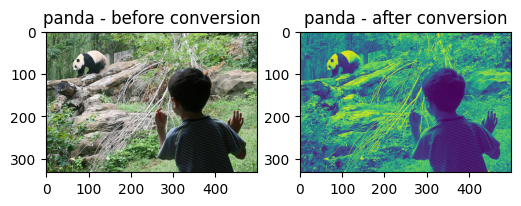

In [13]:
plt.figure(figsize=(6, 6))
plt.subplot(121)
plt.imshow(images[250][0])
plt.title(f"{LABELS[y[250]]} - before conversion")
plt.subplot(122)
plt.imshow(X[250])
plt.title(f"{LABELS[y[250]]} - after conversion")
plt.show()

### Resizing Images

In [7]:
def image_resize(img_arr, size=32, is_library=False):
  if is_library:
    resized_img = cv2.resize(img_arr, (size, size))
    return resized_img

  h, w = img_arr.shape
  resized_img = np.zeros((size, size))
  row_scale = h / size
  col_scale = w / size

  for i in range(32):
    for j in range(32):
      resized_img[i, j] = img_arr[int(i*row_scale), int(j*col_scale)]

  return resized_img

In [14]:
# Resize images
for i in range(len(images)):
  X[i] = image_resize(X[i], 32, is_library=True)

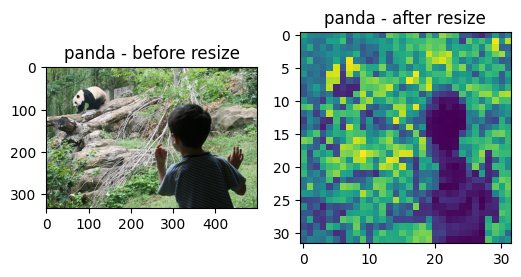

In [15]:
plt.figure(figsize=(6, 6))
plt.subplot(121)
plt.imshow(images[250][0])
plt.title(f"{LABELS[y[250]]} - before resize")
plt.subplot(122)
plt.imshow(X[250])
plt.title(f"{LABELS[y[250]]} - after resize")
plt.show()

# Model Building and Evaluation

In [16]:
# L1 distance
def L1_distance(a, b):
    return np.sum(np.abs(a - b))

# L2 distance
def L2_distance(a, b):
    return np.sqrt(np.sum((a - b) ** 2))

In [17]:
K_values = [1, 3, 5, 7, 9]

### KNN Prediction

In [18]:
def KNN_prediction(X_train, y_train, X_test, k, method="L2"):
  # print(X_train.shape, y_train.shape, X_test.shape)

  distances = []
  for i in range(len(X_train)):
    if method == "L1":
      d = L1_distance(X_test, X_train[i])
    else:
      d = L2_distance(X_test, X_train[i])
    distances.append((d, y_train[i]))

  distances.sort()
  top_k = distances[:k]

  labels = [label for label in top_k]
  predicted_label = max(set(labels), key=labels.count)

  return predicted_label

### Cross Validation

In [19]:
def cross_validation(X, y, K_values, method="L2"):
  print(X.shape, y.shape)
  fold_size = len(X) // 5
  accuracies = []
  preds = {k: [] for k in K_values}

  for k in K_values:
    fold_acc = []
    for fold in range(5):
      start = fold * fold_size
      end = (fold + 1) * fold_size
      # print(start, end)

      X_test = X[start:end]
      y_test = y[start:end]

      if fold == 0:
        X_train = X[end:]
        y_train = y[end:]
      else:
        X_train = np.concatenate([X[:start], X[end:]], axis=0)
        y_train = np.concatenate([y[:start], y[end:]], axis=0)

      correct = 0
      for i in range(len(X_test)):
        _, predicted_label = KNN_prediction(X_train, y_train, X_test[i], k, method)
        preds[k].append(predicted_label)

        # print(f"Predicted: {predicted_label}, Actual: {y_test[i]}")
        if predicted_label == y_test[i]:
          correct += 1

      fold_acc.append(correct / len(X_test))

    accuracies.append(np.mean(fold_acc))

  return accuracies, preds

In [20]:
def show_image(img_arr, label=None):
  plt.figure(figsize=(2, 2))
  plt.imshow(img_arr)
  if label is not None:
    plt.title(f"{LABELS[label]}")
  plt.show()

In [21]:
n = len(X)
n_train = int(0.8 * n)

n_train

240

### shuffle dataset

In [22]:
indices = np.arange(n)
np.random.shuffle(indices)
X_shuffled = X[indices]
y_shuffled = y[indices]

In [23]:
X_train = X_shuffled[:n_train]
y_train = y_shuffled[:n_train]

X_test = X_shuffled[n_train:]
y_test = y_shuffled[n_train:]

len(X_train), len(y_train), len(X_test), len(y_test)

(240, 240, 60, 60)

In [24]:
freq = {}
for i in range(len(y_train)):
  if y_train[i] in freq:
    freq[y_train[i]] += 1
  else:
    freq[y_train[i]] = 1

freq

{np.int64(1): 78, np.int64(2): 81, np.int64(0): 81}

In [25]:
pred = KNN_prediction(X_train, y_train, X_test[19], k=3)
pred[1]

np.int64(0)

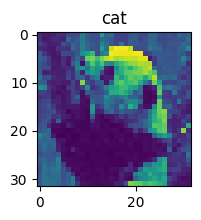

In [26]:
# Actual Label
show_image(X_shuffled[n_train+19], pred[1])

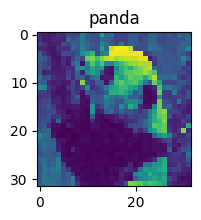

In [27]:
# Predicated Label
show_image(X_test[19], y_test[19])

# Results and Analysis

In [28]:
L1_accuracies, L1_preds = cross_validation(X_train, y_train, K_values, method="L1")
L2_accuracies, L2_preds = cross_validation(X_train, y_train, K_values, method="L2")

(240,) (240,)
(240,) (240,)


In [29]:
L1_accuracies

[np.float64(0.3916666666666667),
 np.float64(0.325),
 np.float64(0.4125),
 np.float64(0.4166666666666667),
 np.float64(0.39583333333333337)]

In [30]:
L1_preds.keys()

dict_keys([1, 3, 5, 7, 9])

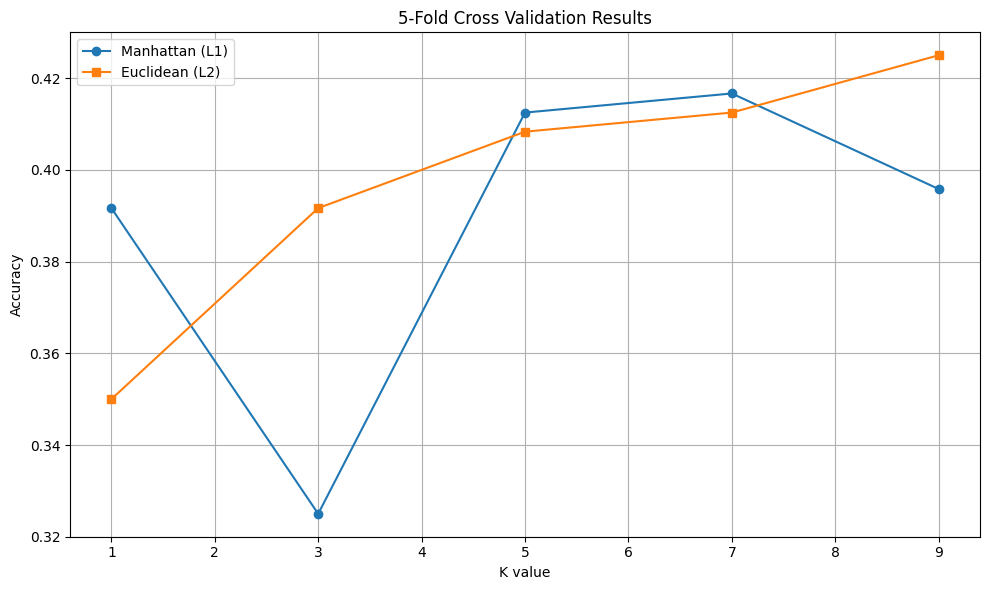

In [37]:
plt.figure(figsize=(10, 6))
plt.plot(K_values, L1_accuracies, label="Manhattan (L1)", marker='o')
plt.plot(K_values, L2_accuracies, label="Euclidean (L2)", marker='s')
plt.xlabel("K value")
plt.ylabel("Accuracy")
plt.title("5-Fold Cross Validation Results")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [32]:
print(L1_preds.keys())
print(np.array(L1_preds[3]).shape)
np.array(y).shape

dict_keys([1, 3, 5, 7, 9])
(240,)


(300,)

# Discussion

The comparison between L1 (Manhattan) and L2 (Euclidean) distances showed the following results that we find from the graph of Accuracy VS K value:
- For K = [1, 5, 7], L1 method showed better accuracy
- For K = [2, 9], L2 method showed better results

For the chosen K values, L2 distance showed consistency in the accuracies where L1 distance has inconsistencies.

Normalized input features showed better accuracy results.

Several other K values could be selected, those might result differently.

# Top 5 Predictions

L1 (Manhattan Distance)

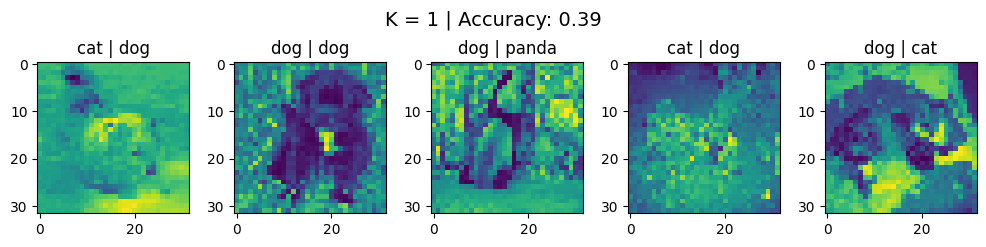

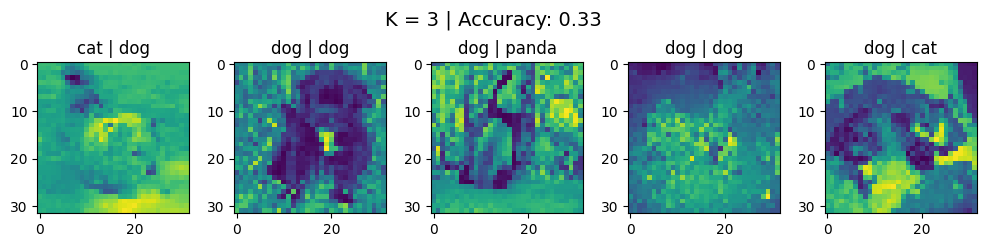

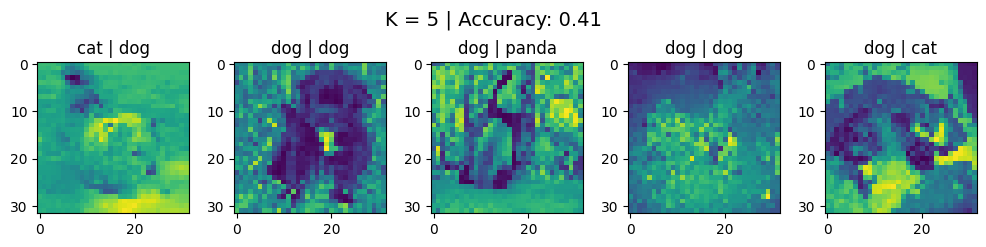

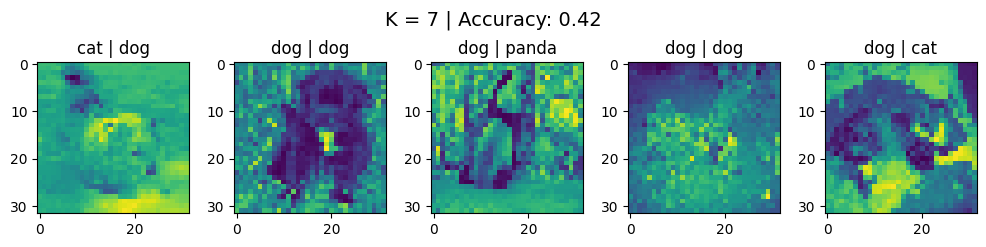

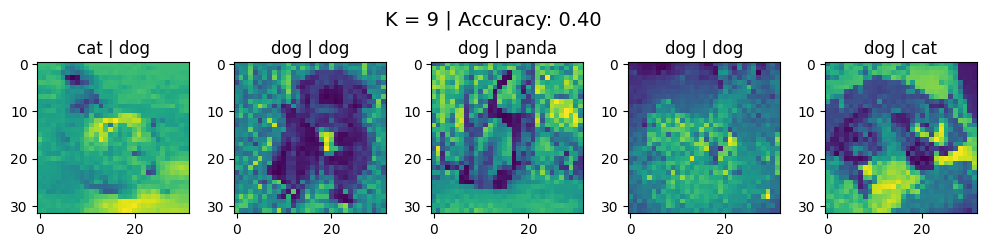

In [42]:
for idx, k in enumerate(K_values):
  plt.figure(figsize=(10,10))
  for i in range(5):
    plt.subplot(5, 5, i+1)
    plt.imshow(X_shuffled[i])
    plt.title(f"{LABELS[L1_preds[k][i]]} | {LABELS[y_shuffled[i]]}")
  plt.suptitle(f"K = {k} | Accuracy: {L1_accuracies[idx]:.2f}", fontsize=14)
  plt.tight_layout()
plt.show()

L2 (Euclidean Distance)

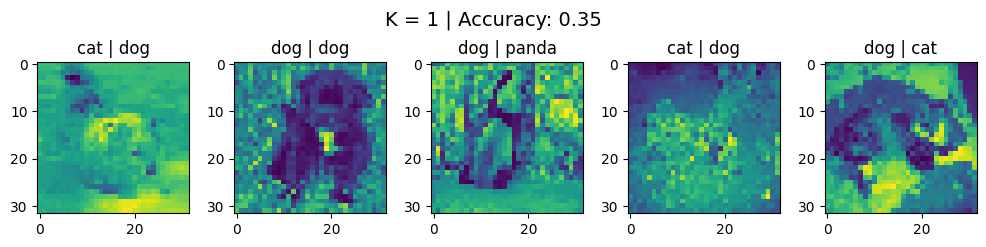

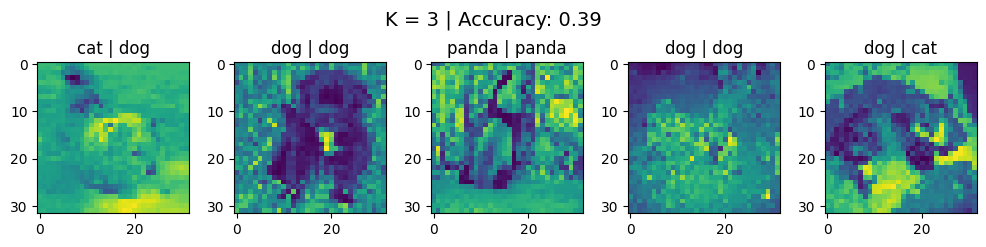

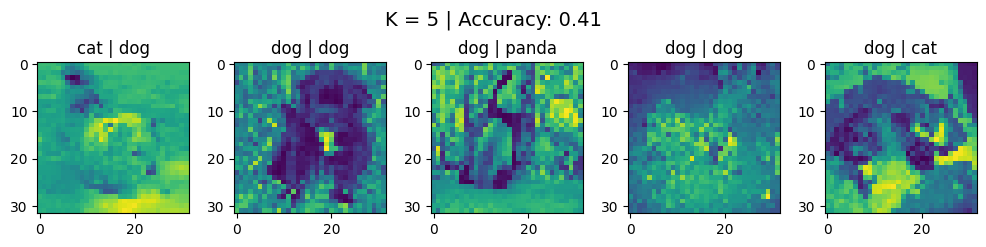

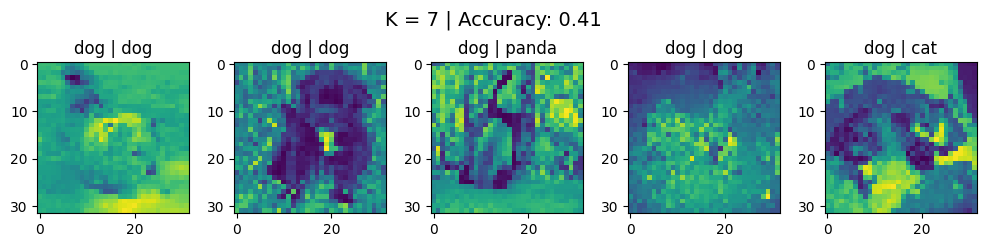

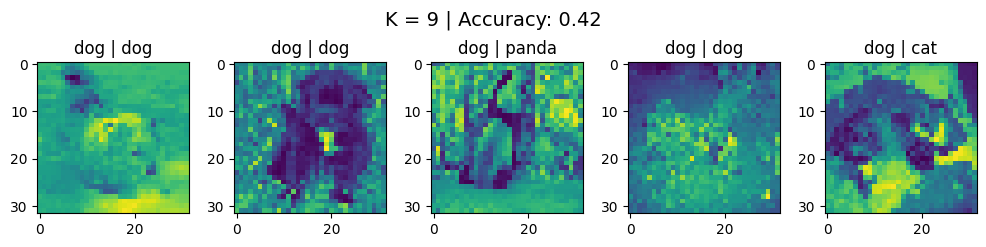

In [34]:
for idx, k in enumerate(K_values):
  plt.figure(figsize=(10,10))
  for i in range(5):
    plt.subplot(5, 5, i+1)
    plt.imshow(X_shuffled[i])
    plt.title(f"{LABELS[L2_preds[k][i]]} | {LABELS[y_shuffled[i]]}")
  plt.suptitle(f"K = {k} | Accuracy: {L2_accuracies[idx]:.2f}", fontsize=14)
  plt.tight_layout()
  plt.show()

In [35]:
L1_accuracies

[np.float64(0.3916666666666667),
 np.float64(0.325),
 np.float64(0.4125),
 np.float64(0.4166666666666667),
 np.float64(0.39583333333333337)]

In [36]:
L2_accuracies

[np.float64(0.35),
 np.float64(0.39166666666666666),
 np.float64(0.4083333333333334),
 np.float64(0.4125),
 np.float64(0.425)]